# Flooding

This package looks at the flooding extend of Peebles, Scotland. This uses mostly just OSM to explore this, however a few plots are provided using DEM elevation data

LINK

https://dwtkns.com/srtm30m/

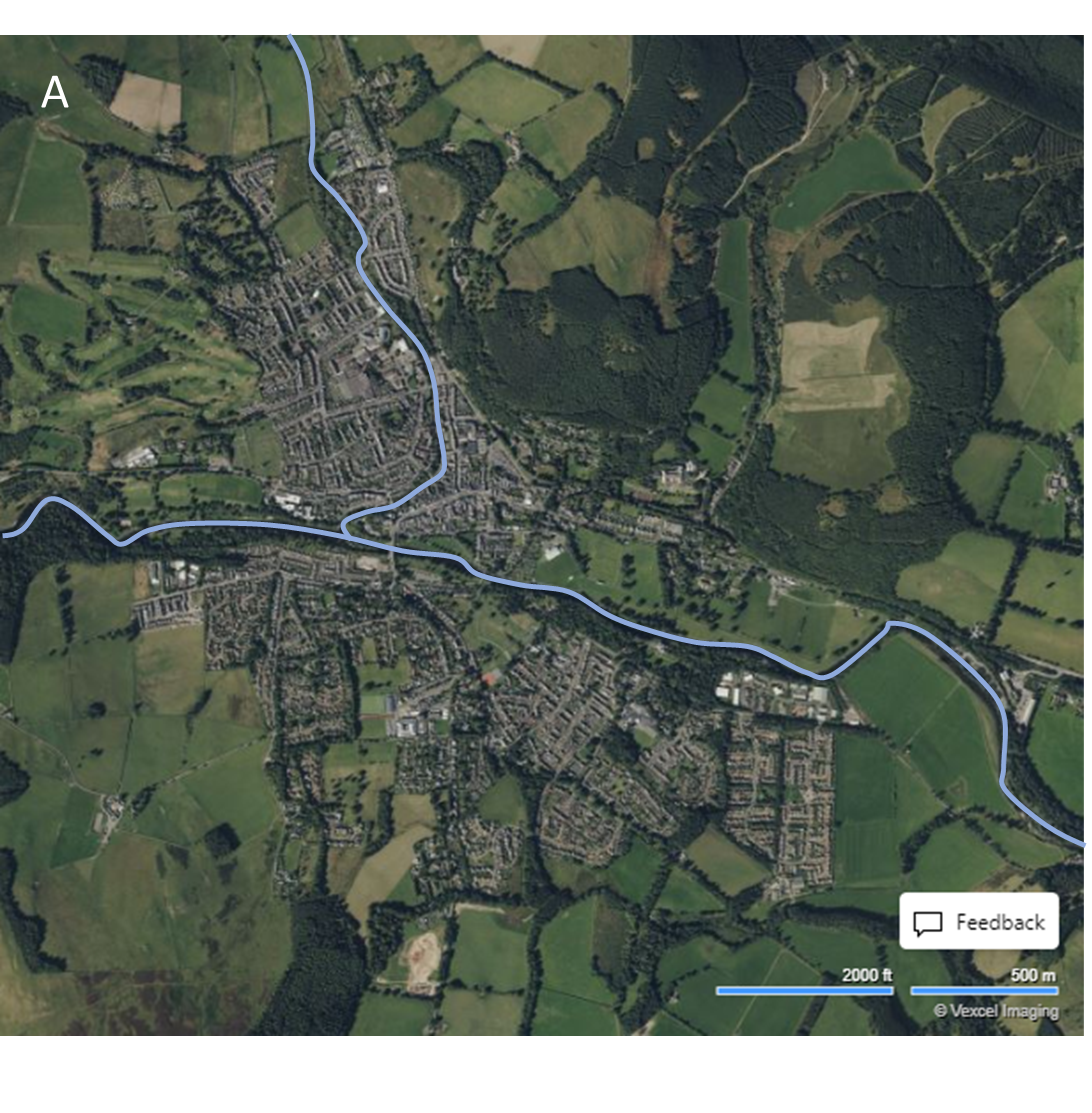

In [8]:
from IPython.display import Image
Image(filename='Peebles.png', width = 400)

In [9]:
import hazards.floods as fl

/home/s1929650/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [10]:
help(fl)

Help on package hazards.floods in hazards:

NAME
    hazards.floods - #Necessary packages

PACKAGE CONTENTS
    buffer_river
    buffered_piechart
    build_step
    building_dis
    building_elev
    building_elev_plot
    building_pieplot
    building_plot
    elevation
    river
    river_data
    river_list
    river_plot

FILE
    /home/s1929650/5_YEAR/hazards 2/hazards/floods/__init__.py




In [11]:
#Peebles Example 
north = 55.6658  # North latitude
south = 55.6372  # South latitude
east = -3.1651   # East longitude
west = -3.2116   # West longitude

buffer = 0.005

#Exeter
name = 'Exeter'

geotiff_file = 'Peebles-30m-DEM.tif'

In [12]:
river, polygon, buffered_polygon = fl.river_list(north, south, east, west, buffer = buffer)

Processing rivers in lat long grid
2 Unique Rivers Extracted:
       River Tweed
       Eddleston Water


Processing rivers in lat long grid
2 Unique Rivers Extracted


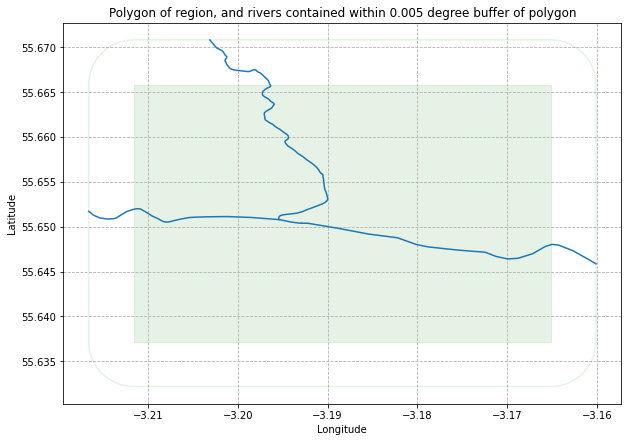

In [13]:
fl.river_plot(north, south, east, west, buffer = buffer, print_list = False)

Processing rivers in: Exeter
5 Unique Rivers Extracted


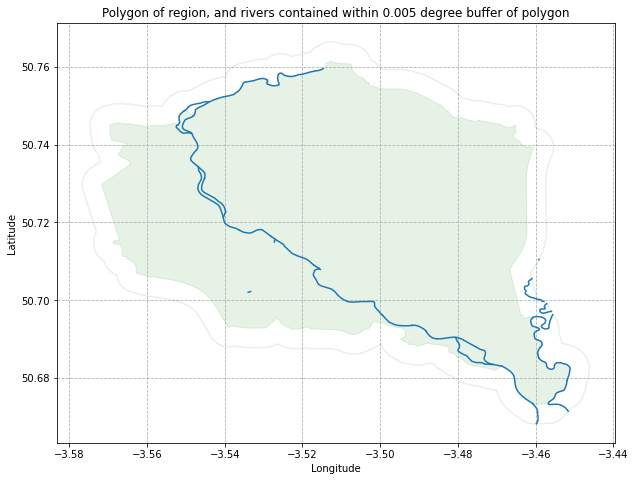

In [14]:
fl.river_plot('Exeter', buffer = buffer, print_list = False)

In [15]:
river = fl.river_elevation(geotiff_file, north, south, east, west, buffer = buffer)

Processing rivers in lat long grid
2 Unique Rivers Extracted:
       River Tweed
       Eddleston Water


In [16]:
river

geometry  \
element_type osmid                                                          
way          116045681  LINESTRING (-3.19288 55.65039, -3.19217 55.650...   
             156508065  LINESTRING (-3.37671 55.60351, -3.37327 55.604...   
             765770146  LINESTRING (-3.20740 55.75161, -3.20737 55.751...   

                                   name  \
element_type osmid                        
way          116045681      River Tweed   
             156508065      River Tweed   
             765770146  Eddleston Water   

                                                             new geometry  \
element_type osmid                                                          
way          116045681  LINESTRING (-3.192884 55.6503853, -3.1921712 5...   
             156508065  LINESTRING (-3.2165999999999997 55.65171836073...   
             765770146  LINESTRING (-3.2031028441763736 55.6708, -3.20...   

                                                             km distances  \
element_type osmid                                                          
way          116045681  LINESTRING (355.03250216458525 6182.8192051015...   
             156508065  LINESTRING (357.66960104488754 6182.8894303229...   
             765770146  LINESTRING (356.16878579316926 6185.0534728237...   

                                                               elevations  
element_type osmid                                                         
way          116045681  [161, 160, 160, 162, 158, 163, 164, 162, 161, ...  
             156508065  [166, 169, 179, 178, 181, 181, 166, 166, 167, ...  
             765770146  [169, 170, 170, 167, 167, 167, 167, 167, 167, ...

### Buildings

Processing lat long grid


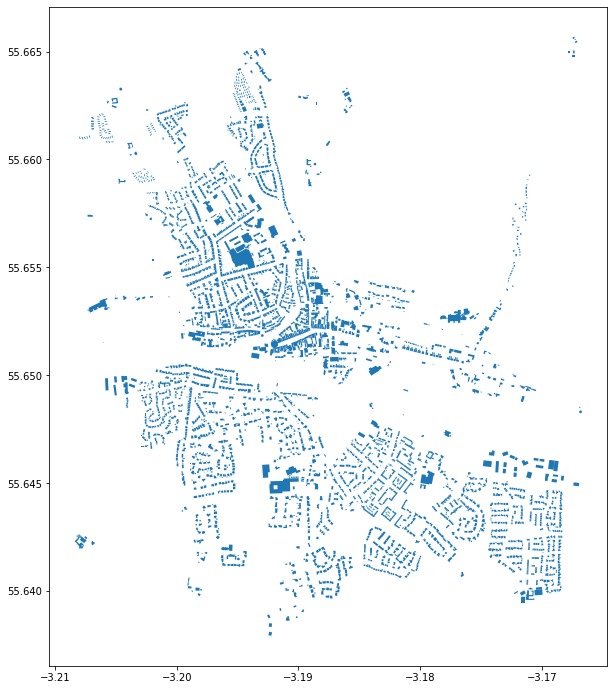

In [17]:
fl.building_plot(north, south, east, west)

Processing rivers in lat long grid
2 Unique Rivers Extracted:
       River Tweed
       Eddleston Water
Processing lat long grid


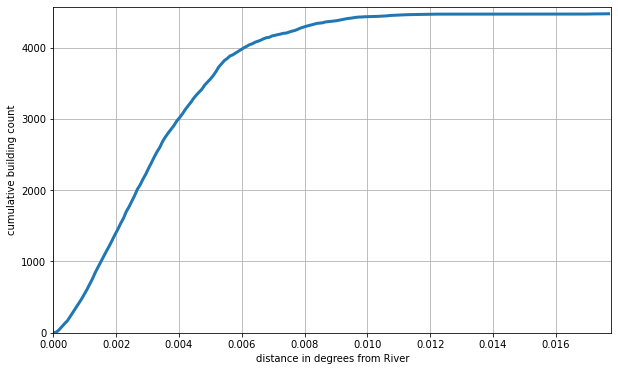

In [18]:
buildings = fl.building_dis(north, south, east, west)

Processing rivers in lat long grid
2 Unique Rivers Extracted:
       River Tweed
       Eddleston Water
Processing lat long grid


/home/s1929650/5_YEAR/hazards 2/hazards/floods/building_elev.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buildings['relative elevation'].iloc[i] = rel_elev


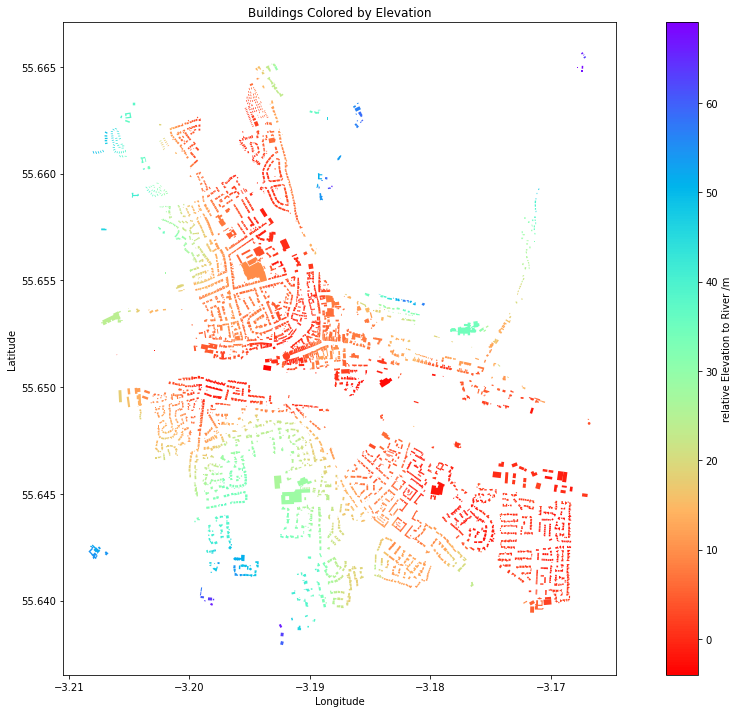

In [19]:
#buildings = fl.building_elev(geotiff_file, north, south, east, west)
fl.building_elev_plot(geotiff_file, north, south, east, west)

In [20]:
help(fl.buffered_piechart)

Help on function buffered_piechart in module hazards.floods.buffered_piechart:

buffered_piechart(*args, buffer_distance=0.003, inner_distance=None, river_cutoff=0.005, n=9, m=20, print_list=True)
    Return a pie plot of n categories (plus other) and a bar chart of m categories for the top n+m building classifications in the chosen region. These building classifications have been extracted from OpenStreetMaps (OSM).
    This pieplot specifically returns the buildings classifications within the degree buffer_distance from the river profile. 
    
    Parameters
    ----------
    *args: Union[str, Tuple[float, float, float, float]]
        The positional arguments. This accepts either a single string 'location' value, which must be recognized as a region in OSM. Otherwise, 4 float arguments are accepted as 'north, south, east, west', defining a box for the chosen region
        
    buffer_distance: float, Optional
        buffer_distance is the degree distance from the river in which 

Processing lat long grid
number of yes 0    0
1    0
dtype: int64


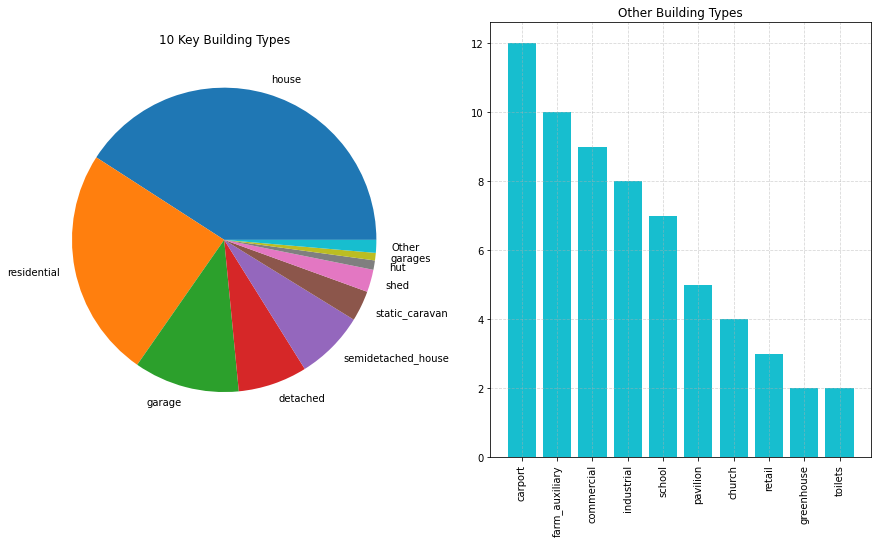

In [21]:
fl.building_pieplot(north, south, east, west,m = 10)

Processing rivers in lat long grid
2 Unique Rivers Extracted:
       River Tweed
       Eddleston Water
Processing rivers in lat long grid
2 Unique Rivers Extracted
Processing lat long grid


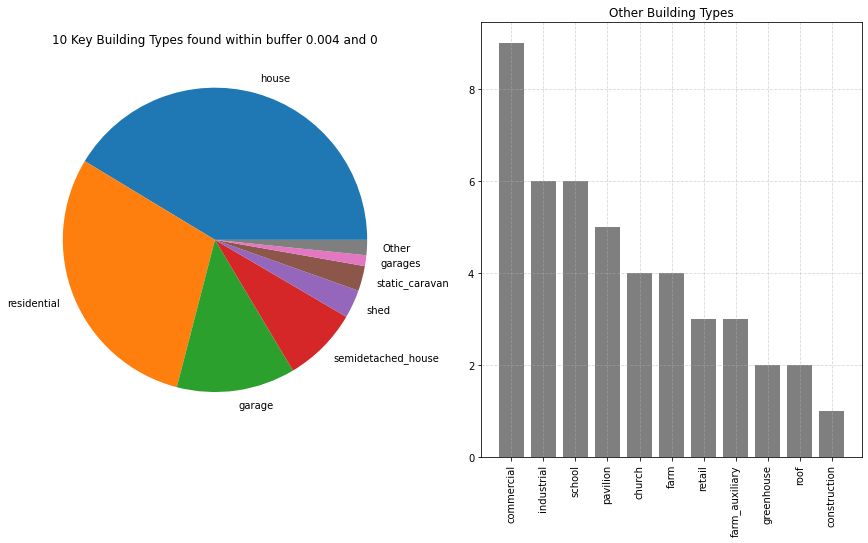

In [22]:
b = fl.buffered_piechart(north, south, east, west, inner_distance= 0, buffer_distance= 0.004, n = 7, m=11) 